Understanding the dataset

In [2]:
#Importing necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_and_describe(file_name):
    #This func loads the dataset
    try:
        data = pd.read_csv(file_name)
        print(f"Loaded the data {file_name} successfully")
        #Perform data description
        print("\n data set head")
        display(data.head())
        print("\n")
        print(data.info())
        print("\n")
        display(data.describe())
        print("\n")
        print("Skewness:")
        print(data.skew(numeric_only=True))
        print("\n")
        print("Kurtosis:")
        print(data.kurt(numeric_only=True))
    except Exception as e:
        print(f"Error loading the dataset: {e}")
        return None

In [4]:
load_and_describe('Titanic.csv')

Loaded the data Titanic.csv successfully

 data set head


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None




,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




Skewness:
survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64


Kurtosis:
survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64


Data cleaning and preprocessing

In [6]:
data = pd.read_csv("Titanic.csv")

In [7]:
def clean_data(data):
    #Handle missing values,duplicates and outliers
    #Duplicates
    print("Checking for duplicate values")
    print(f"Duplicate values: {data.duplicated().sum()}")
    data=data.drop_duplicates()
    print(f"Duplicates removed. remaining data: {len(data)}")

    #Missing values
    print("\n Checking for missing values:")
    print(round(data.isnull().sum()/ len(data) * 100,2))
    data = data.fillna(value={'age': data['age'].mean(),
                              'deck': 'Unknown',
                              'embarked': data['embarked'].mode()[0],
                              'embark_town':data['embark_town'].mode()[0]})
    print(f"\n row count after missing value imputation: \n{round(data.isnull().sum() / len(data) * 100,2)}")

#Outlier detection and treatment
    numeric_data = data.select_dtypes(include=np.number)
    for col in numeric_data.columns:
        Q1 = data[col].quantile(0.25)
        Q2= data[col].quantile(0.5)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1-(1.5*IQR)
        UW = Q3 + (1.5*IQR)
        outliers = ((data[col] < LW) | (data[col] > UW))
        if outliers.sum() > 0:
            print(f"{col} has {outliers.sum() / len(data) * 100:.2f}% outliers")
        else:
            print(f"{col} does not have any outliers")
    #Outlier Treatment
        data.loc[(data[col] < LW) | (data[col] > UW),col] = Q2
    return data

In [8]:
clean_data(data)

Checking for duplicate values
Duplicate values: 107
Duplicates removed. remaining data: 784

 Checking for missing values:
survived        0.00
pclass          0.00
sex             0.00
age            13.52
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.26
class           0.00
who             0.00
adult_male      0.00
deck           74.23
embark_town     0.26
alive           0.00
alone           0.00
dtype: float64

 row count after missing value imputation: 
survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
deck           0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64
survived does not have any outliers
pclass does not have any outliers
age has 4.97% outliers
sibsp has 4.97% outliers
parch has 1.91% outliers
fare has 13.01% outliers


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,0,29.1250,Q,Third,woman,False,Unknown,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.869351,1,2,23.4500,S,Third,woman,False,Unknown,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Identyfing Trends

In [10]:
def identify_trends(data):
    #Identifying trends through visuals
    #Bar plot
    sns.countplot(x="survived",data=data)
    plt.xlabel("Survival status")
    plt.ylabel("Count")
    plt.title("Survival count")
    plt.show()
    
    #histogram
    plt.hist(data['age'],bins=10)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Distribution Count")
    plt.show()

    #scatter plot
    plt.scatter(data['age'],data['fare'])
    plt.xlabel('Age')
    plt.ylabel("Fare")
    plt.title("Age v Fare")
    plt.show()

    #boxplot
    sns.boxplot(x = data["survived"], y=data["fare"])
    plt.xlabel("Survival status")
    plt.ylabel("fare")
    plt.title("Survival vs fare")
    plt.show()

    numeric_data = data.select_dtypes(include=np.number)
    if len(numeric_data.columns) >=2:
        plt.figure(figsize=(10,6))
        sns.pairplot(numeric_data,hue="survived",palette = "Set2",diag_kind="hist")
        plt.suptitle("Pair plot of numerical features",y=1.02)
        plt.show()
        

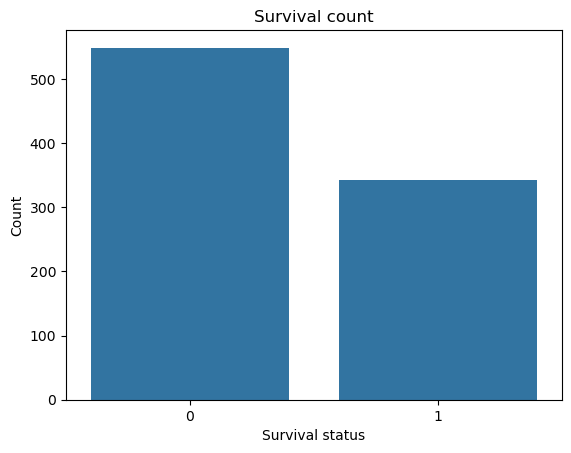

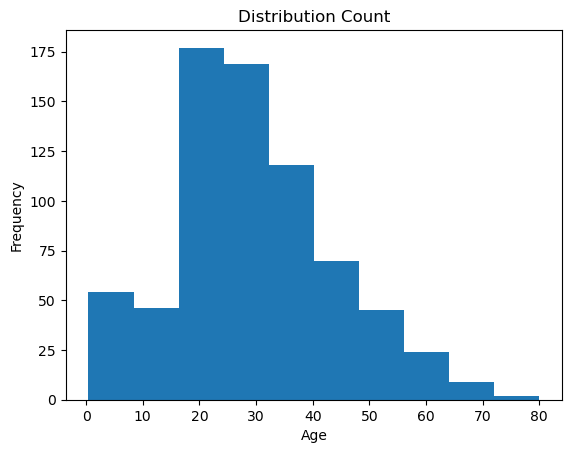

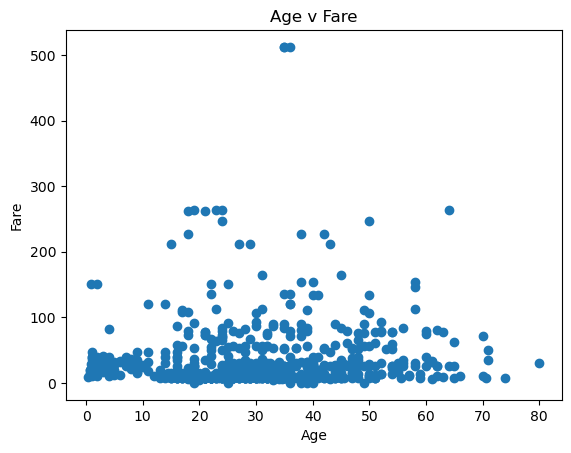

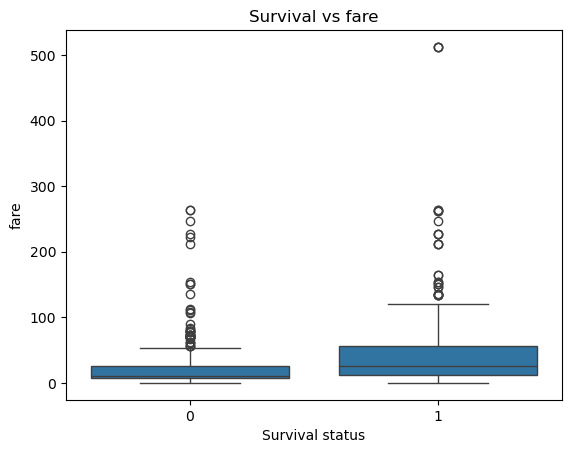

<Figure size 1000x600 with 0 Axes>

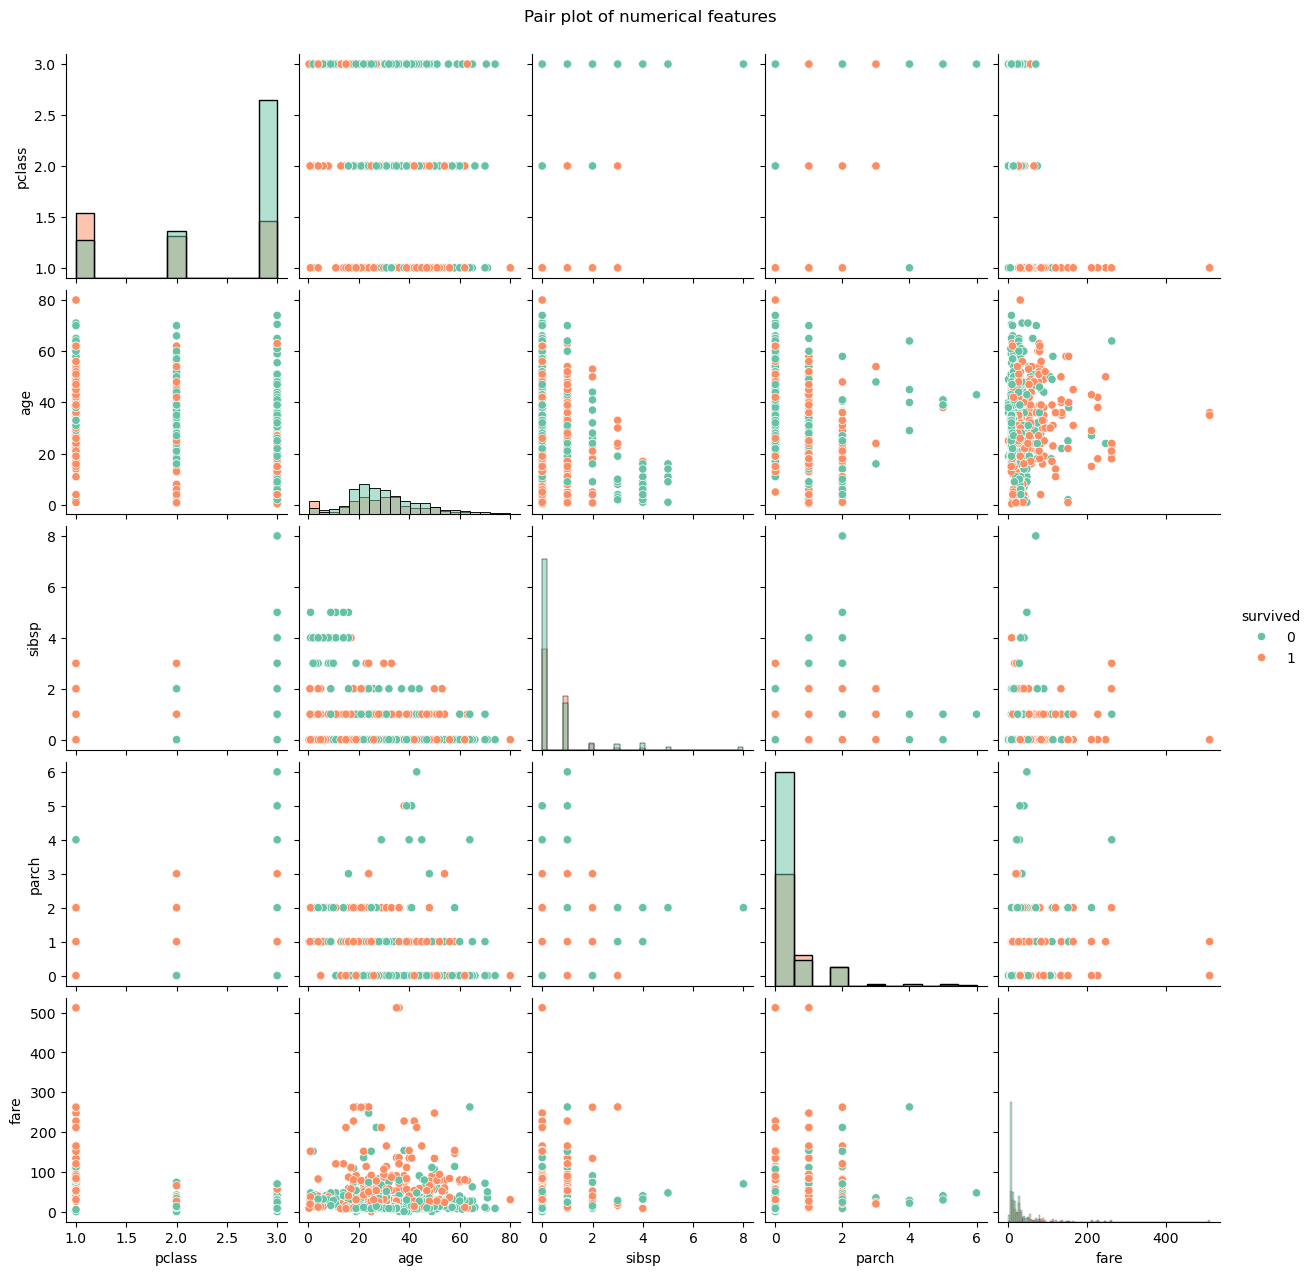

In [11]:
identify_trends(data)

In [13]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
corre = round(data.corr(numeric_only=True)*100,2)
corre

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,100.00,-33.85,-7.72,-3.53,8.16,25.73,-55.71,-20.34
pclass,-33.85,100.00,-36.92,8.31,1.84,-54.95,9.40,13.52
age,-7.72,-36.92,100.00,-30.82,-18.91,9.61,28.03,19.83
sibsp,-3.53,8.31,-30.82,100.00,41.48,15.97,-25.36,-58.45
parch,8.16,1.84,-18.91,41.48,100.00,21.62,-34.99,-58.34
fare,25.73,-54.95,9.61,15.97,21.62,100.00,-18.20,-27.18
adult_male,-55.71,9.40,28.03,-25.36,-34.99,-18.20,100.00,40.47
alone,-20.34,13.52,19.83,-58.45,-58.34,-27.18,40.47,100.00


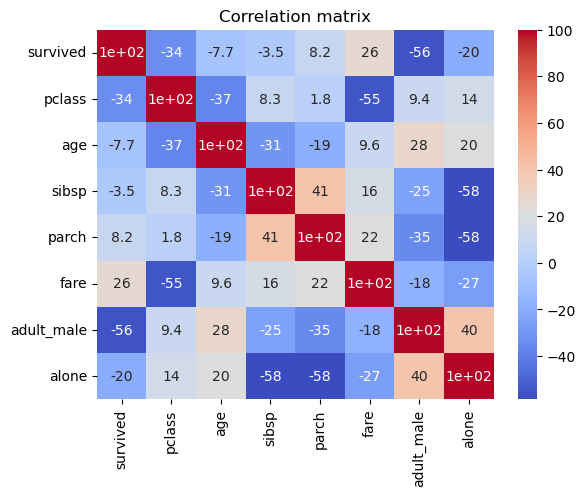

In [15]:
sns.heatmap(corre,annot=True,cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

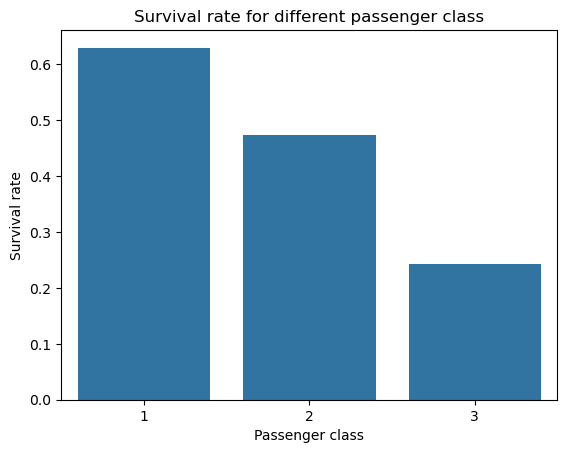

In [16]:
sns.barplot(x="pclass",y='survived',data=data,errorbar=None)
plt.title("Survival rate for different passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival rate")
plt.show()

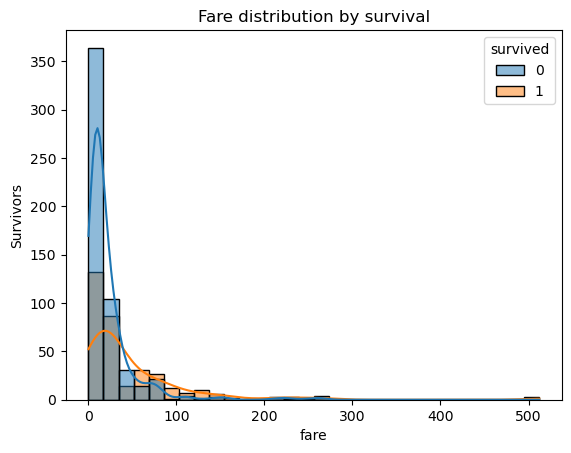

In [17]:
sns.histplot(data=data,x='fare',hue='survived',bins=30,kde=True)
plt.title("Fare distribution by survival")
plt.xlabel("fare")
plt.ylabel("Survivors")
plt.show()

In [18]:
data['FamilySize'] = data['sibsp'] + data['parch'] + 1
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [19]:
data['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

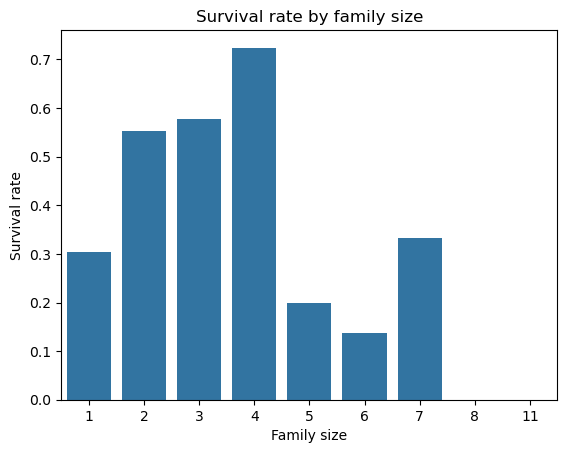

In [20]:
sns.barplot(x="FamilySize",y = 'survived',data=data,errorbar=None)
plt.title("Survival rate by family size")
plt.xlabel('Family size')
plt.ylabel("Survival rate")
plt.show()

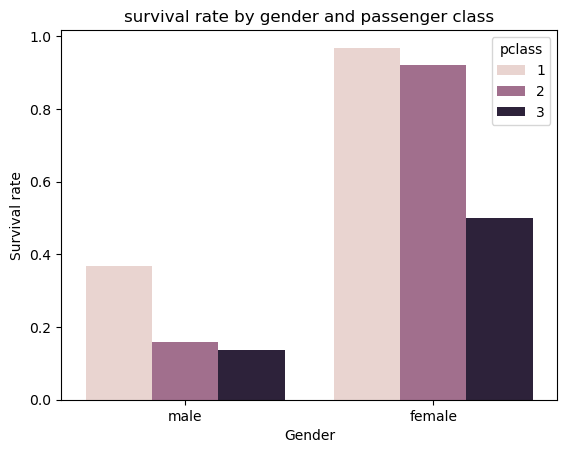

In [21]:
sns.barplot(data=data,x="sex",y="survived",hue="pclass",errorbar=None)
plt.title("survival rate by gender and passenger class")
plt.xlabel("Gender")
plt.ylabel("Survival rate")
plt.show()

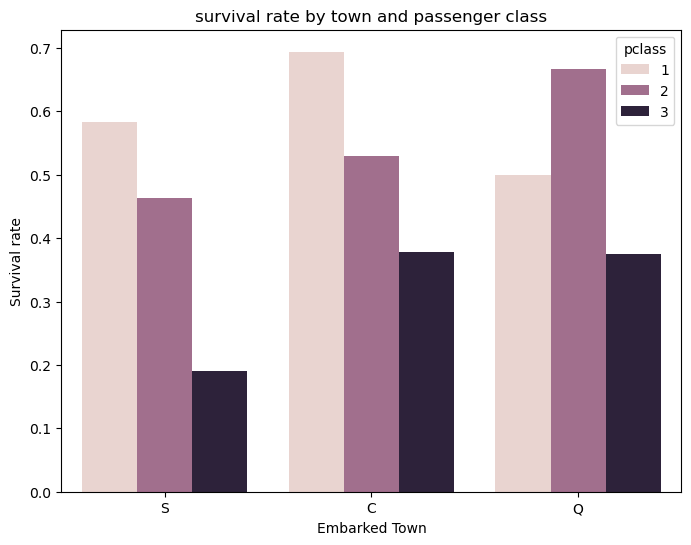

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="embarked",y="survived",hue="pclass",errorbar=None)
plt.title("survival rate by town and passenger class")
plt.xlabel("Embarked Town")
plt.ylabel("Survival rate")
plt.show()

In [23]:
def visualize_results(data):
    #Generate visualizations
    #Corr analysis
    corre = round(data.corr(numeric_only=True)*100,2)
    sns.heatmap(corre,annot=True,cmap="coolwarm")
    plt.title("Correlation matrix")
    plt.show()

    #pclass vs survival
    sns.barplot(x="pclass",y='survived',data=data,errorbar=None)
    plt.title("Survival rate for different passenger class")
    plt.xlabel("Passenger class")
    plt.ylabel("Survival rate")
    plt.show()

    #survival analysis by fare through histogram
    sns.histplot(data=data,x='fare',hue='survived',bins=30,kde=True)
    plt.title("Fare distribution by survival")
    plt.xlabel("fare")
    plt.ylabel("Survivors")
    plt.show()

    #family size analysis
    data['FamilySize'] = data['sibsp'] + data['parch'] + 1
    sns.barplot(x="FamilySize",y = 'survived',data=data,errorbar=None)
    plt.title("Survival rate by family size")
    plt.xlabel('Family size')
    plt.ylabel("Survival rate")
    plt.show()

    #Gender by survival
    sns.barplot(data=data,x="sex",y="survived",hue="pclass",errorbar=None)
    plt.title("survival rate by gender and passenger class")
    plt.xlabel("Gender")
    plt.ylabel("Survival rate")
    plt.show()

    #Survival rate by embark town
    plt.figure(figsize=(8,6))
    sns.barplot(data=data,x="embarked",y="survived",hue="pclass",errorbar=None)
    plt.title("survival rate by town and passenger class")
    plt.xlabel("Embarked Town")
    plt.ylabel("Survival rate")
    plt.show()

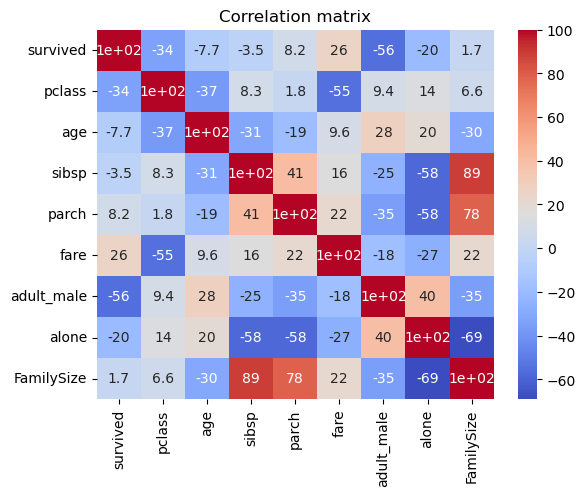

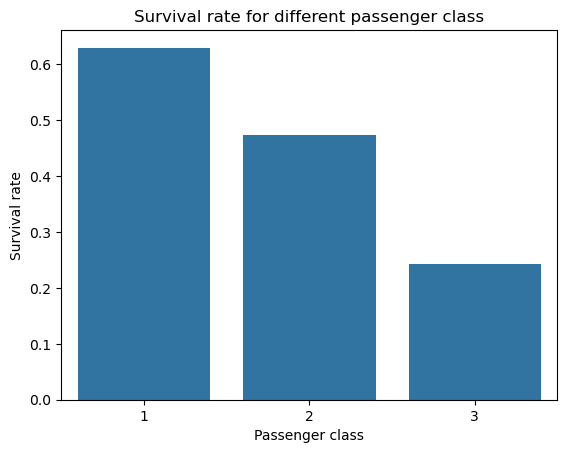

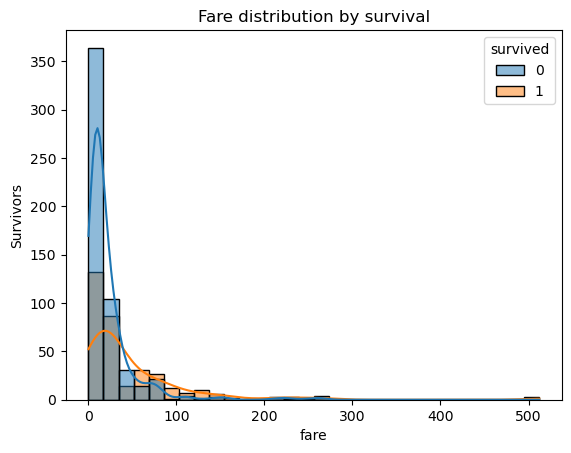

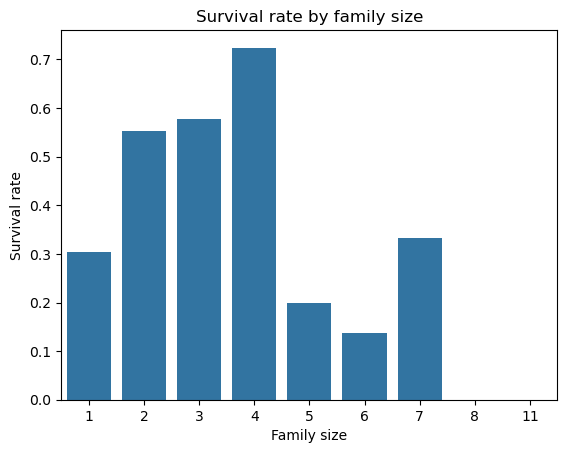

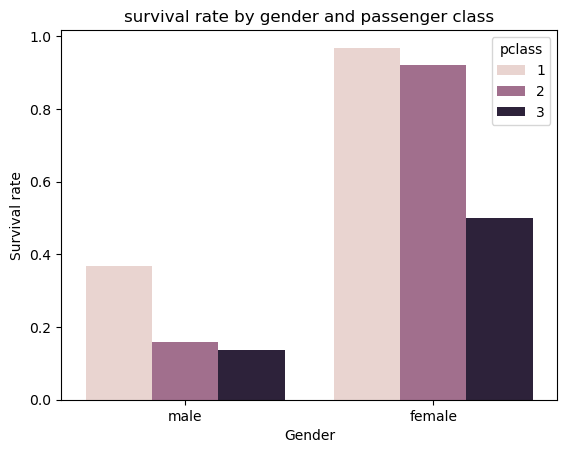

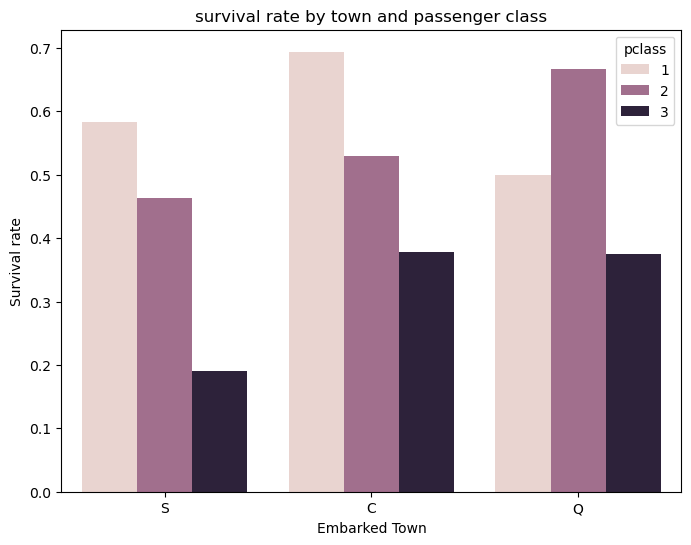

In [24]:
visualize_results(data)

In [25]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [26]:
def eda_function():
    file_name='titanic.csv'

    print("="*10,"Understanding the dataset","="*10)
    data = load_and_describe(file_name)

    print("="*10,"Cleaning and preprocessing","="*10)
    cleaned_df = clean_data(data)

In [27]:
eda_function()

========== Understanding the dataset ==========
Loaded the data titanic.csv successfully

 data set head


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None




,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




Skewness:
survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64


Kurtosis:
survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64
========== Cleaning and preprocessing ==========
Checking for duplicate values


AttributeError: 'NoneType' object has no attribute 'duplicated'